# LAB 8: K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
import io
dataset = pd.read_csv(r"C:\Users\msila\Downloads\Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
dataset.shape

(200, 5)

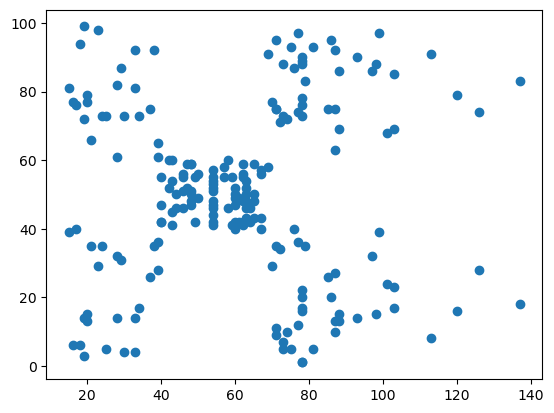

In [5]:
plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'])

In [6]:
X = dataset.iloc[:,[3,4]].values

In [7]:
print(X[0:5,:])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


### Using the elbow method to find the optimal number of clusters

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


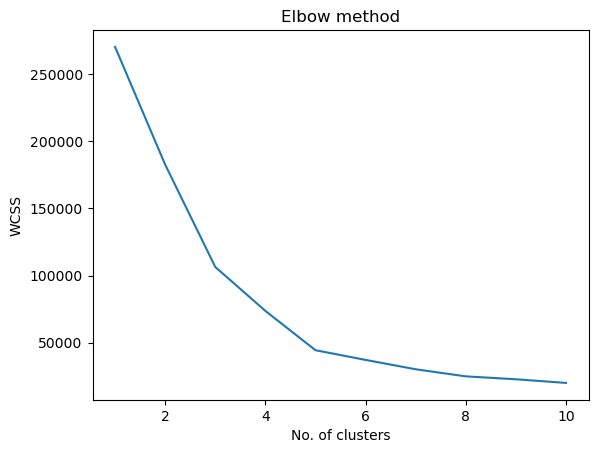

In [8]:
#  wcss within cluster sum of square
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++',random_state= 39)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

## Training the K-Means model on the dataset

In [9]:
kmeans = KMeans(n_clusters= 5, init='k-means++',random_state= 39)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=39)

## Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit()

In [10]:
# The lowest SSE value
kmeans.inertia_

44448.45544793371

In [11]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])

In [12]:
# The number of iterations required to converge
kmeans.n_iter_

6

In [13]:
#Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_
kmeans.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4,
       2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 0, 4, 0, 1, 0, 1, 0,
       4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

## Creating Output labels for Generating Graph

In [14]:
y_kmeans = kmeans.fit_predict(X)

In [15]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 4 2 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 1 0 4 0 1 0 1 0 4 0 1 0 1 0 1 0 1 0 4 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(kmeans.labels_,y_kmeans))

1.0


## Visualising the clusters

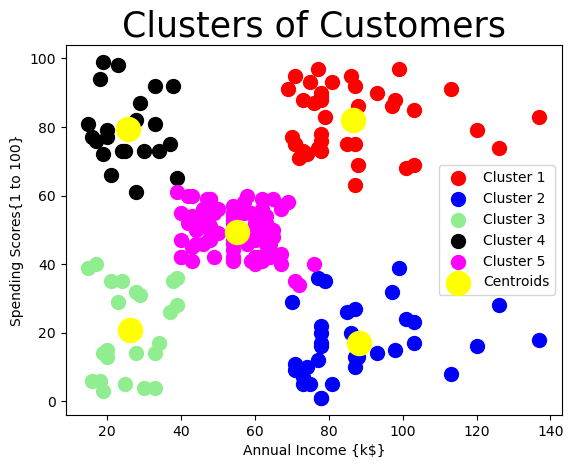

In [17]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=100, c = 'red', label ="Cluster 1")
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=100, c = 'blue', label ="Cluster 2")
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=100, c = 'lightgreen', label ="Cluster 3")
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=100, c = 'black', label ="Cluster 4")
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=100, c = 'magenta', label ="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300, c = 'Yellow',label = 'Centroids')
plt.title("Clusters of Customers",size = 25)
plt.xlabel("Annual Income {k$}")
plt.ylabel("Spending Scores{1 to 100}")
plt.legend()
plt.show()

## Evaluating the model

In [18]:
from sklearn.metrics import homogeneity_score
print("homogeneous labeling score of our model=",homogeneity_score(kmeans.labels_,y_kmeans))

homogeneous labeling score of our model= 1.0


## Test your knowledge

##### Q2. Crete the model using following parameter setting and write down the result

**Optimal Number of cluster**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


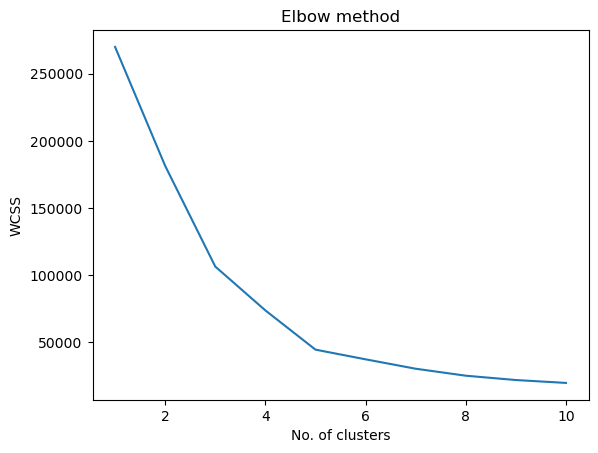

In [19]:
#  wcss within cluster sum of square
from sklearn.cluster import KMeans
wcss2 = []
for i in range(1,11):
    kmeans2 =KMeans(n_clusters=i,init='random', random_state=39,
              n_init=57,max_iter=157,tol=0.00001)
    kmeans2.fit(X)
    wcss2.append(kmeans2.inertia_)
plt.plot(range(1,11),wcss2)
plt.title("Elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

In [20]:
kmeans2=KMeans(n_clusters=5,init='random', random_state=39,
              n_init=57,max_iter=157,tol=0.00001)

In [21]:
kmeans2.fit(X)

KMeans(init='random', max_iter=157, n_clusters=5, n_init=57, random_state=39,
       tol=1e-05)

In [22]:
y_pred_kmeans2 = kmeans2.fit_predict(X)

**homogeneity_score**

In [23]:
print("homogeneous labeling score of our model=",homogeneity_score(kmeans2.labels_,y_pred_kmeans2))

homogeneous labeling score of our model= 1.0


**Inertia of the model**

In [24]:
kmeans2.inertia_

44448.45544793371

**Cluster centers**

In [25]:
kmeans2.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [27]:
# The number of iterations required to converge
kmeans2.n_iter_

7